In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '101001'

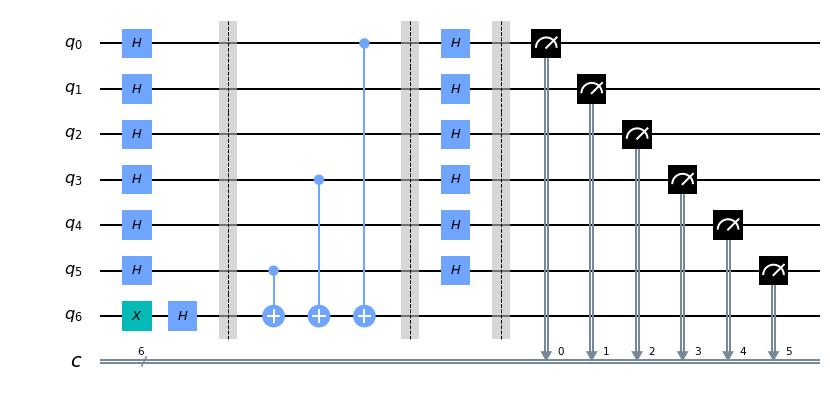

In [3]:
# bagian A
circuit = QuantumCircuit(6+1, 6)

# bagian B
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.barrier()

# bagian C
circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(0, 6)
circuit.barrier()

# bagian D
circuit.h([0,1,2,3,4,5])
circuit.barrier()

# bagian E
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.draw(output="mpl")

{'101001': 1}


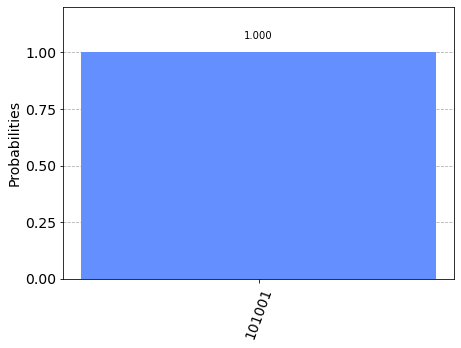

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

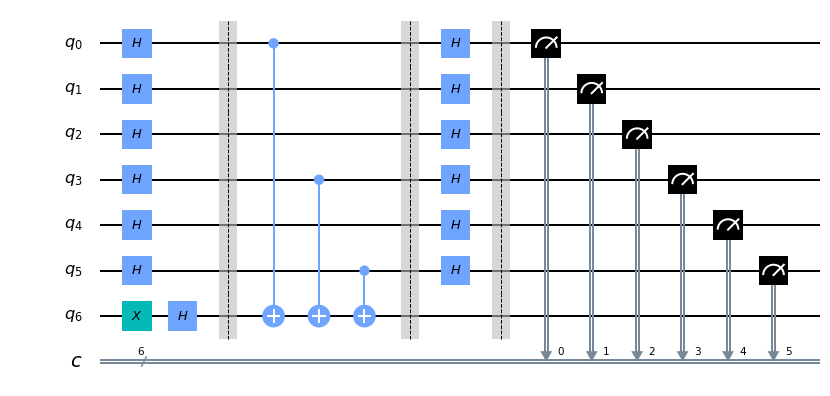

In [5]:
# bagian A
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

# bagian B
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

# bagian C
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))
circuit.barrier()

# bagian D
circuit.h(range(len(secretnumber)))
circuit.barrier()

# bagian E
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))
circuit.draw(output="mpl")

{'101001': 1}


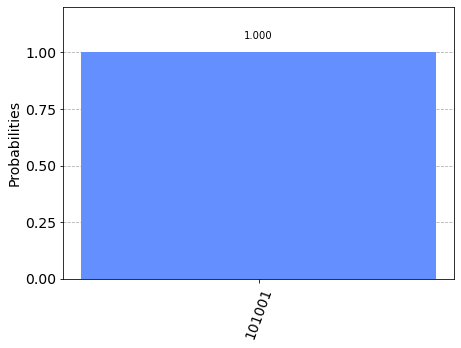

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)